# Задание со звездочкой

<pre>
ФИО: Никифоров Владимир
</pre>

In [17]:
import pandas as pd
import scipy.stats as sts
from scipy.stats import mannwhitneyu

from matplotlib import pyplot as plt
%matplotlib inline

In [41]:
df = pd.read_csv('../data/Статистика_за_2018_год__1_.csv', encoding='windows-1251')
df.head()

,Число бракованных листов,Скорость прокатки,Марка стали
0,3,3.8,A
1,3,3.8,B
2,3,4.8,B
3,4,4.4,B
4,6,5.0,B


In [43]:
df['more_than_3'] = df['Число бракованных листов'].apply(lambda x: 1 if x > 3 else 0)

# получим данные по партиям для стали марок А и В
df_a = df[df['Марка стали']=='A']
print(f'Count of examples A = {df_a.shape[0]}')
df_b = df[df['Марка стали']=='B']
print(f'Count of examples B = {df_b.shape[0]}')

Count of examples A = 139
Count of examples B = 98


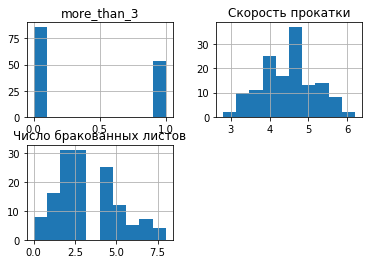

In [44]:
# распределения данных по марке А
df_a.hist();

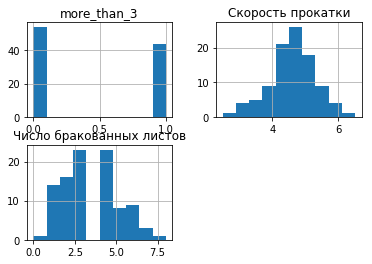

In [45]:
# распределения данных по марке В
df_b.hist();

### Проверим, что "Более 3 бракованных листов на партию выходит значимо чаще для стали марки А, чем для стали марки B."

In [50]:
df_a_more_than_3 = df_a['more_than_3'].values
print(df_a_more_than_3)
df_b_more_than_3 = df_b['more_than_3'].values
print(df_b_more_than_3)

[0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0
 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1
 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1]
[0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0
 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0]


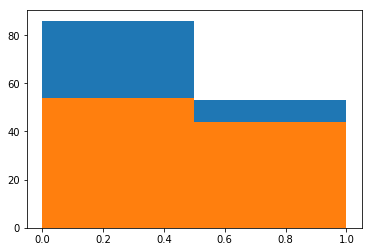

In [54]:
plt.hist(df_a_more_than_3, bins=df['more_than_3'].max()+1);
plt.hist(df_b_more_than_3, bins=df['more_than_3'].max()+1);

In [52]:
sts.ttest_ind(df_a_more_than_3, df_b_more_than_3)

Ttest_indResult(statistic=-1.0415849657241676, pvalue=0.29867451363841385)

In [53]:
mannwhitneyu(df_a_more_than_3, df_b_more_than_3)

MannwhitneyuResult(statistic=6350.0, pvalue=0.14910766474479942)